2.89108787647306
8.947967851717774


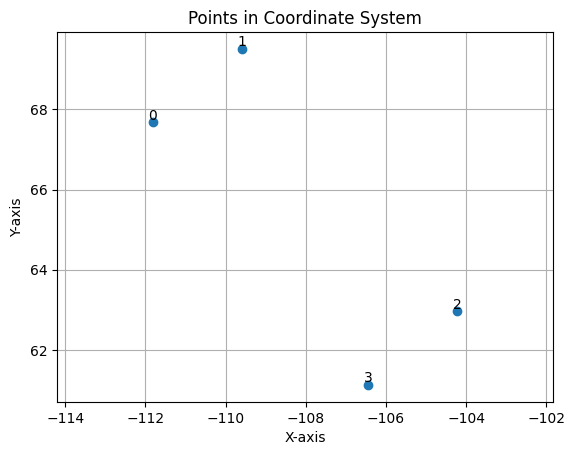

'\nIn order to test whether the point (xp, yp) lies on the left-hand side of the edge (x1, y1) - (x2, y2), you just need to calculate:\nD = (x2 - x1) * (yp - y1) - (xp - x1) * (y2 - y1)\nIf D > 0, the point is on the left-hand side. If D < 0, the point is on the right-hand side. If D = 0, the point is on the line.\n'

In [11]:
import carla
import math
import random
import time
import queue
import numpy as np
import cv2

client = carla.Client('localhost', 2000)
world  = client.get_world()
bp_lib = world.get_blueprint_library()


world_snapshot = world.wait_for_tick()


actor_list = world.get_actors()
vehicles = actor_list.filter('vehicle.*.*')
peds = actor_list.filter('walker.pedestrian.*')
current_map = world.get_map()

# for v in peds:
#     actor_snapshot = world_snapshot.find(v.id)
#     v1 = world.get_actor(v.id)
#     v1_bb_location = [list(map(float,[v.x,v.y,v.z])) for v in v1.bounding_box.get_world_vertices(actor_snapshot.get_transform())][0::2]
#     location = v1.get_transform().location
#     location = tuple(map(float,[location.x, location.y, location.z]))
#     rotation = v1.get_transform().rotation
#     rotation = tuple(map(float,[rotation.pitch, rotation.yaw, rotation.roll]))
#     angular_velocity = v1.get_angular_velocity()
#     angular_velocity = tuple(map(float,[angular_velocity.x, angular_velocity.y, angular_velocity.z]))
#     velocity = v1.get_velocity()
#     velocity = tuple(map(float,[velocity.x, velocity.y, velocity.z]))
#     acceleration = v1.get_acceleration()
#     acceleration = tuple(map(float,[acceleration.x, acceleration.y, acceleration.z]))
#     # 
#     vehicle_lane_id = current_map.get_waypoint(actor_snapshot.get_transform().location).lane_id
#     print("INFO:",vehicle_lane_id)

for v in vehicles:
    actor_snapshot = world_snapshot.find(v.id)
    v2 = world.get_actor(v.id)
    v2_bb_location = [list(map(float,[v.x,v.y,v.z])) for v in v2.bounding_box.get_world_vertices(actor_snapshot.get_transform())][0::2]

# print(v1, v2)
x = [v2_bb_location[1][0]-v2_bb_location[0][0],v2_bb_location[1][1]-v2_bb_location[0][1]]
y = [v2_bb_location[2][0]-v2_bb_location[1][0],v2_bb_location[2][1]-v2_bb_location[1][1]]
print(math.sqrt(x[0]**2+x[1]**2))
print(math.sqrt(y[0]**2+y[1]**2))
import matplotlib.pyplot as plt

# Define the points
# v1_bb_location[2], v1_bb_location[3] = v1_bb_location[3], v1_bb_location[2] 
v2_bb_location[2], v2_bb_location[3] = v2_bb_location[3], v2_bb_location[2] 
# points = v1_bb_location + v2_bb_location
points = v2_bb_location

# Separate the x and y coordinates
x_values = [point[0] for point in points]
y_values = [point[1] for point in points]

# Plot the points
plt.scatter(x_values, y_values)

# Add labels
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a title
plt.title('Points in Coordinate System')

# Add gridlines
plt.grid(True)

# Set equal aspect ratio
plt.axis('equal')

# Annotate points with their indices
for i, point in enumerate(points):
    plt.text(point[0], point[1], str(i), ha='center', va='bottom')

# Show the plot
plt.show()


"""
In order to test whether the point (xp, yp) lies on the left-hand side of the edge (x1, y1) - (x2, y2), you just need to calculate:
D = (x2 - x1) * (yp - y1) - (xp - x1) * (y2 - y1)
If D > 0, the point is on the left-hand side. If D < 0, the point is on the right-hand side. If D = 0, the point is on the line.
"""
# d_list1 = list()
# for p0 in v1_bb_location:
#     d_point = list()
#     for idx, p1 in enumerate(v2_bb_location):
#         p2 = v2_bb_location[(idx+1)%4]
#         d = (p2[0]-p1[0]) * (p0[1]-p1[1]) - (p0[0]-p1[0]) * (p2[1]-p1[1])
#         d_point.append(d)
#     if max(d_point) < 0:
#         print("Found.",d_point)
#         print(points.index(p0))
#     d_list1.append(d_point)

# d_list2 = list()
# for p0 in v2_bb_location:
#     d_point = list()
#     for idx, p1 in enumerate(v1_bb_location):
#         p2 = v1_bb_location[(idx+1)%4]
#         d = (p2[0]-p1[0]) * (p0[1]-p1[1]) - (p0[0]-p1[0]) * (p2[1]-p1[1])
#         d_point.append(d)
#     if max(d_point) < 0:
#         print("Found.",d_point)
#         print(points.index(p0))
#     d_list2.append(d_point)

# print("d_list1", d_list1)
# print("d_list2", d_list2)


In [4]:
a = [1,1]
b = [2,2]



TypeError: unsupported operand type(s) for -: 'list' and 'list'

### Requirments test


In [1]:
import os
from models import *
from scenic.miscs.requirements import Requirements


requirements = Requirements("/home/weidong/Documents/data_2024_09_05_14_38_04.csv")
rbs=dict()
behavior = "ego_overtake"
exec(f"rbs['{behavior}'] = requirements.{behavior}('C1')")


# results = requirements.evaluate(rbs)
rbs

/home/weidong/Tools/Scenic/src/scenic/core/errors.py:271: UserWarning: unable to install sys.excepthook to format Scenic backtraces
  warnings.warn("unable to install sys.excepthook to format Scenic backtraces")


{'ego_overtake': (-4.75241722114546, 7.688239260474443)}

In [4]:
import math

def two_points_distance(p1,p2):
    d = math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)
    return d

a = two_points_distance((-1.85845971107483,248.486755371094), (-1.9811669588089,254.959197998047
))
a

6.473605689864382

In [20]:
import numpy as np

# Assuming you have a CSV file named 'data.csv' with a header line
# First few lines of data.csv:
# Name,Age,Score
# John,25,85
# Alice,30,90
dtype = [
            ('Name', str),
            ('Age', int),
            ('Score', float),
]

# Use np.genfromtxt to read the CSV file
data = np.genfromtxt('data.csv', dtype=dtype, delimiter=',', skip_header=1, encoding='utf-8')
result = np.stack((data['Score'], data['Age']), axis=1)

s = data[(data['Score']==90)]
s['Age']

array([30])

In [21]:
import numpy as np
import math
a = np.array([24,3,5,6,7,1,15,62,82,88])
b = np.array([12,4,35,16,37,51,15,62,82,88])

print(a[:4]>b[:4])


[ True False False False]


In [22]:
print("xxx \"sdasd\"")

xxx "sdasd"
